# Análise dos dados da Pesquisa Nacional de Saúde do Escolar - PeNSE

---

# Resumo

Inicialmente foi feita a análise dos dados da amostra 2 da Pesquisa Nacional de Saúde do Escolar comfoco nas características socio-econômicas. Entender como a amostra de distribuia econfirmar se ela retratava um pedaço significativo dos brasileiros.
No segundo momento a análise foi concentrada na identificação de fatores de risco de suicídio infantil, conforme literatura de apoio. Com base na literatura identificamos participanetes que se enquadram em alguns fatores de risco de suicídio infantil.

---

## Importando as bibliotecas mais comuns e configurações iniciais

In [1]:
# Manipulação
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Abrir arquivos zip
from zipfile import ZipFile


# Deixar os gráficos do pyplot com o mesmo tema do seaborn
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (10,6)

# Colocar o tema padão do seaborn
sns.set_theme()

# deixar o número de casas depois do ponto flutuante fixo em 2 casas
pd.options.display.float_format = "{:.2f}".format

## Abrindo o arquivo .zip da amostra 2

In [2]:
path_zip = 'PeNSE_2015_AMOSTRA2.zip' # no meu caso, o notebook está na mesma pasta que o arquivo zip
arq_zip = ZipFile(path_zip)
conteudo_arquivo_zip = arq_zip.namelist()[0] # como sabia que era o primeiro arquivo, não precisei explorar o conteúdo

df = pd.read_csv(arq_zip.open(conteudo_arquivo_zip), sep=';')
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,"299,735235",1,2,4,1,5,1,296


---

## Visão preliminar do dataset

In [3]:
print(f"{df.shape[0]} linhas e {df.shape[1]} colunas")

16556 linhas e 181 colunas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Data columns (total 181 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    ANOPESQ        16556 non-null  int64  
 1    PAIS           16556 non-null  int64  
 2    REGEOGR        16556 non-null  int64  
 3    VB00004        16556 non-null  int64  
 4    VB01001        16556 non-null  int64  
 5    VB01002        16556 non-null  int64  
 6    VB01003        16556 non-null  int64  
 7    VB01004        16556 non-null  int64  
 8    VB01005        16556 non-null  int64  
 9    VB01006        16556 non-null  int64  
 10   VB01007        16556 non-null  int64  
 11   VB01008A       16556 non-null  int64  
 12   VB01010A       16556 non-null  int64  
 13   VB01011        16556 non-null  int64  
 14   VB01012        16556 non-null  int64  
 15   VB01013        16556 non-null  int64  
 16   VB01014        16556 non-null  int64  
 17   VB01015A       16556 non-null

### Mesmo com características de dados qualitativos, a maioria dos dados são numéricos.
### Começar pelos dados não numéricos

In [6]:
# a coluna peso deveria ser numérica
df.PESO

0        299,735235
1        355,170081
2        299,735235
3        355,170081
4        299,735235
            ...    
16551    447,815539
16552     592,50744
16553    401,131512
16554    442,718091
16555     592,50744
Name: PESO, Length: 16556, dtype: object

In [7]:
df.PESO = df.PESO.str.replace(',', '.')
df.PESO = df.PESO.astype('float64')
df.PESO

0       299.74
1       355.17
2       299.74
3       355.17
4       299.74
         ...  
16551   447.82
16552   592.51
16553   401.13
16554   442.72
16555   592.51
Name: PESO, Length: 16556, dtype: float64

In [8]:
# Peso do estudante, incluindo os imputados, com uma casa decimal 
df.VB17003

0        37,1
1        50,2
2        48,2
3        69,4
4        78,9
         ... 
16551    56,7
16552    61,9
16553    60,9
16554    47,3
16555    62,6
Name: VB17003, Length: 16556, dtype: object

In [9]:
# Altura do estudante, incluindo os imputados, com uma casa decimal
df.VB17004

0          157
1          152
2        161,4
3        172,5
4        167,5
         ...  
16551    167,9
16552    185,8
16553    159,4
16554    157,8
16555    163,9
Name: VB17004, Length: 16556, dtype: object

In [10]:
df.VB17003 = df.VB17003.str.replace(',', '.')
df.VB17003 = df.VB17003.astype('float64')
df.VB17004 = df.VB17004.str.replace(',', '.')
df.VB17004 = df.VB17004.astype('float64')
df.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Data columns (total 181 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    ANOPESQ        16556 non-null  int64  
 1    PAIS           16556 non-null  int64  
 2    REGEOGR        16556 non-null  int64  
 3    VB00004        16556 non-null  int64  
 4    VB01001        16556 non-null  int64  
 5    VB01002        16556 non-null  int64  
 6    VB01003        16556 non-null  int64  
 7    VB01004        16556 non-null  int64  
 8    VB01005        16556 non-null  int64  
 9    VB01006        16556 non-null  int64  
 10   VB01007        16556 non-null  int64  
 11   VB01008A       16556 non-null  int64  
 12   VB01010A       16556 non-null  int64  
 13   VB01011        16556 non-null  int64  
 14   VB01012        16556 non-null  int64  
 15   VB01013        16556 non-null  int64  
 16   VB01014        16556 non-null  int64  
 17   VB01015A       16556 non-null

---

## Checando o dicionário de dados esperamos que algumas colunas tenham apenas 1 valor, sendo desnecessário para uma análise

In [11]:
# visualizar na transposta é melhor nesse caso
df.T[df.nunique() == 1]

,0,1,2,3,4,5,6,7,8,9,...,16546,16547,16548,16549,16550,16551,16552,16553,16554,16555
ANOPESQ,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,...,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00,2015.00
PAIS,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,...,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00
VB00004,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Como esperado as colunas que especificam informações que não variam:
### 1. Ano da pesquisa
### 2. País da pesquisa
### 3. Se o estudante aceita participar da pesquisa, os que não aceitaram não estão na base de dados

In [12]:
df.drop(['ANOPESQ', 'PAIS', 'VB00004'], axis=1, inplace=True)
df.head()

,REGEOGR,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,1,2,1,13,7,7,1,2,7,3,...,1223,1,299.74,1,2,4,1,1,1,296
1,1,2,1,14,4,7,1,1,7,3,...,1223,1,355.17,1,2,4,1,2,1,296
2,1,1,4,13,6,7,1,1,5,5,...,1223,1,299.74,1,2,4,1,3,1,296
3,1,1,1,14,6,7,1,1,7,4,...,1223,1,355.17,1,2,4,1,4,1,296
4,1,1,1,13,9,7,1,2,5,4,...,1223,1,299.74,1,2,4,1,5,1,296


---

# Análise inicial
## Socio-econômico

## Nessa análise esperamos encontrar o perfil socio-econômico da amostra e encontrar alguma característica de viés

In [13]:
df_com_nomes = df.copy()

In [14]:
# Substituições para facilitar a análise

df_com_nomes.REGEOGR = df_com_nomes.REGEOGR.replace({1 : 'Norte', 2 : 'Nordeste', 3 : 'Sudeste', 4 : 'Sul', 5 : 'Centro-Oeste'})
df_com_nomes.VB01001 = df_com_nomes.VB01001.replace({1 : 'Masculino', 2 : 'Feminino'})
df_com_nomes.VB01002 = df_com_nomes.VB01002.replace({1 : 'Branca', 2 : 'Preta', 3 : 'Amarela', 4 : 'Parda', 5 : 'Indígena', 99 : 'Não informado'})
df_com_nomes.VB01006 = df_com_nomes.VB01006.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01007 = df_com_nomes.VB01007.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01013 = df_com_nomes.VB01013.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01014 = df_com_nomes.VB01014.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01015A = df_com_nomes.VB01015A.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01016 = df_com_nomes.VB01016.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01017 = df_com_nomes.VB01017.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB01021 = df_com_nomes.VB01021.replace({1 : '5ª série', 2 : '6ª série', 3 : '7ª série', 4 : '8ª série', 5 : '1º ano', 6 : '2º ano', 7 : '3º ano', 99 : 'Não informado'})
df_com_nomes.VB01022 = df_com_nomes.VB01022.replace({1 : 'Manhã', 2	: 'Intermediário', 3 : 'Tarde', 4 : 'Noite', 5	: 'Integral', 99 : 'Não informado'})
df_com_nomes.V0006 = df_com_nomes.V0006.replace({1 : 'Urbana', 2 : 'Rural'})
df_com_nomes.V0007 = df_com_nomes.V0007.replace({1 : 'Pública', 2 : 'Privada'})
df_com_nomes.V0008 = df_com_nomes.V0008.replace({1 : 'Municipal', 2 : 'Estadual', 3 : 'Federal', 4 : 'Privada'})
df_com_nomes.V0041 = df_com_nomes.V0041.replace({-1 : 'Pulo no questionário', 1 : 'Particular', 2 : 'Comunitária', 3 : 'Confessional', 4 : 'Filantrópica'})
df_com_nomes.VB01019 = df_com_nomes.VB01019.replace({1 : "Não tem banheiro", 2 : "1 banheiro", 3 : "2 banheiros", 4 : "3 banheiros", 5 : "4 banheiros ou mais", 99 : "Não informado"})
df_com_nomes.VB02024 = df_com_nomes.VB02024.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maior parte das vezes', 5 : 'Sempre', 99 : 'Não informado'})

In [15]:
df_com_nomes.rename(columns={'REGEOGR' : 'regiao_geografica', 'VB01001' : 'sexo', 'VB01002' : 'cor_ou_raca', 'VB01003' : 'idade', 'VB01021' : 'serie_atual', 'VB01022' : 'turno', 
                   'VB01006' : 'mora_com_mae', 'VB01007' : 'mora_com_pai', 'VB01014' : 'possui_celular', 'VB01015A' : 'computador_em_casa', 
                   'VB01016' : 'internet_em_casa', 'VB01017' : 'carro_em_casa', 'V0006' : 'esc_urbana_ou_rural','V0007' : 'esc_publica_ou_privada',
                   'V0008' : 'esfera_adm_escola', 'VB01019' : 'quantidade_banheiros_casa', 'VB02024' : 'frequencia_ficar_com_fome_sem_comida_em_casa', 
                   'V0041' : 'tipo_escola_privada', 'VB01013' : 'telefone_fixo_em_casa'}, inplace=True)

In [16]:
df_socioeconomico = df_com_nomes[['regiao_geografica', 'sexo', 'cor_ou_raca', 'idade', 'serie_atual', 'turno', 'mora_com_mae', 'mora_com_pai', "telefone_fixo_em_casa",
                        'possui_celular', 'computador_em_casa', 'internet_em_casa', 'carro_em_casa', 'esc_urbana_ou_rural','esc_publica_ou_privada', 
                        'esfera_adm_escola', 'quantidade_banheiros_casa','frequencia_ficar_com_fome_sem_comida_em_casa', 'tipo_escola_privada']]
df_socioeconomico

,regiao_geografica,sexo,cor_ou_raca,idade,serie_atual,turno,mora_com_mae,mora_com_pai,telefone_fixo_em_casa,possui_celular,computador_em_casa,internet_em_casa,carro_em_casa,esc_urbana_ou_rural,esc_publica_ou_privada,esfera_adm_escola,quantidade_banheiros_casa,frequencia_ficar_com_fome_sem_comida_em_casa,tipo_escola_privada
0,Norte,Feminino,Branca,13,8ª série,Manhã,Sim,Não,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,3 banheiros,Nunca,Particular
1,Norte,Feminino,Branca,14,8ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,1 banheiro,Nunca,Particular
2,Norte,Masculino,Parda,13,8ª série,Manhã,Sim,Sim,Não,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Nunca,Particular
3,Norte,Masculino,Branca,14,8ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,3 banheiros,Nunca,Particular
4,Norte,Masculino,Branca,13,8ª série,Manhã,Sim,Não,Não,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,4 banheiros ou mais,Às vezes,Particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,Centro-Oeste,Feminino,Parda,12,7ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Raramente,Particular
16552,Centro-Oeste,Masculino,Branca,15,7ª série,Manhã,Sim,Sim,Não,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Nunca,Particular
16553,Centro-Oeste,Masculino,Parda,13,7ª série,Manhã,Sim,Sim,Sim,Não,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Raramente,Particular
16554,Centro-Oeste,Masculino,Parda,14,7ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Nunca,Particular


---

### Visão geral da amostra

In [17]:
# distribuição amostral nas regiões geográficas
df_socioeconomico.regiao_geografica.value_counts()

Nordeste        3465
Centro-Oeste    3420
Sudeste         3276
Sul             3207
Norte           3188
Name: regiao_geografica, dtype: int64

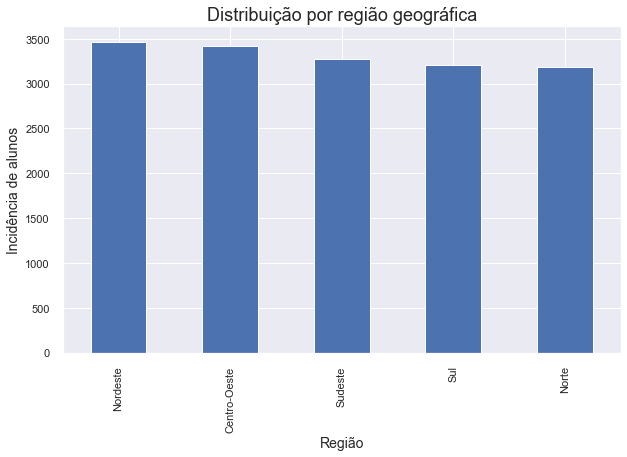

In [18]:
df_socioeconomico.regiao_geografica.value_counts().plot(kind='bar')
plt.title("Distribuição por região geográfica", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Região', fontsize=14)
plt.show()

### Distribuição da amostra tentou ser bem distribuído quanto a região geográfica

---

In [19]:
df_socioeconomico.sexo.value_counts()

Masculino    8287
Feminino     8269
Name: sexo, dtype: int64

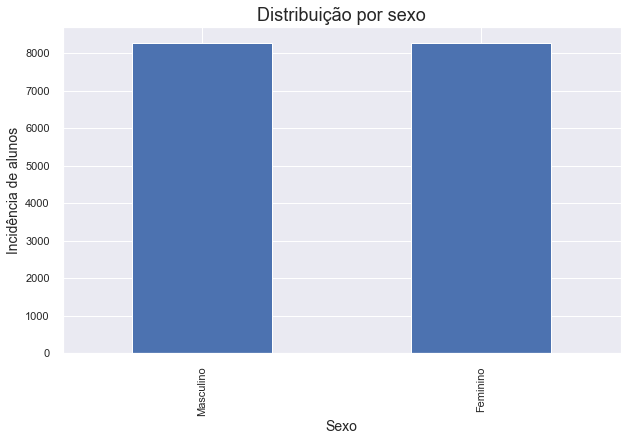

In [20]:
df_socioeconomico.sexo.value_counts().plot(kind='bar')
plt.title("Distribuição por sexo", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Sexo', fontsize=14)
plt.show()

## Da mesma maneira a distribuição por sexo são próximos
### Observação de que essa pesquisa não trata de identidade de gênero

---

In [21]:
df_socioeconomico.cor_ou_raca.value_counts()

Parda            6726
Branca           6575
Preta            1939
Amarela           712
Indígena          581
Não informado      23
Name: cor_ou_raca, dtype: int64

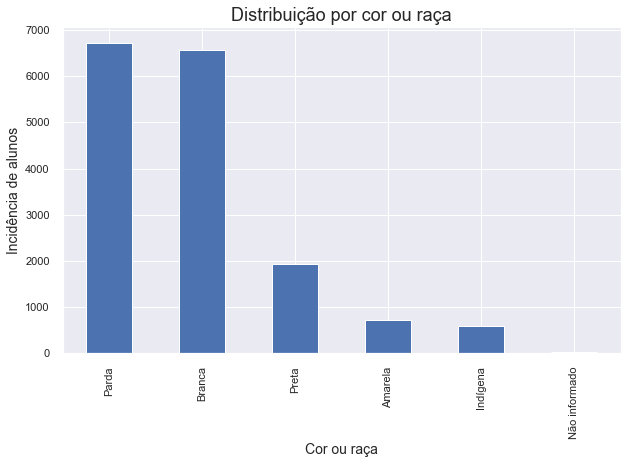

In [22]:
df_socioeconomico.cor_ou_raca.value_counts().plot(kind='bar')
plt.title("Distribuição por cor ou raça", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Cor ou raça', fontsize=14)
plt.show()

### Há uma diferença bem acentuada nessa observação

In [23]:
# resultado percentual
df_socioeconomico.cor_ou_raca.value_counts(normalize=True)

Parda           0.41
Branca          0.40
Preta           0.12
Amarela         0.04
Indígena        0.04
Não informado   0.00
Name: cor_ou_raca, dtype: float64

### Proporção próxima ao encontrado pelo próprio IBGE no PNAD 2015:
#### 45% Brancos, 45% Pardos, 9% Pretos, 1% Amarelo ou Indígena.
#### Fonte:
https://cnae.ibge.gov.br/en/component/content/article/95-7a12/7a12-vamos-conhecer-o-brasil/nosso-povo/16049-cor-ou-raca.html

---

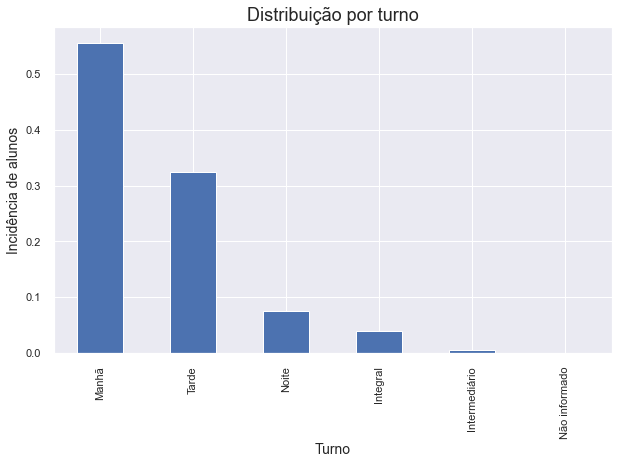

In [24]:
df_socioeconomico.turno.value_counts(normalize=True).plot(kind='bar')
plt.title("Distribuição por turno", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Turno', fontsize=14)
plt.show()

### Mais da metade dos alunos pesquisados estudam no turno da manhã
### Fica a pergunta se isso decorre do método de pesquisa que fez preferência pelo turno da manhã ou os alunos dos outros horários não quiseram participar da pesquisa, ou ainda,  há realmente mais alunos no turno da manhã pelo Brasil

---

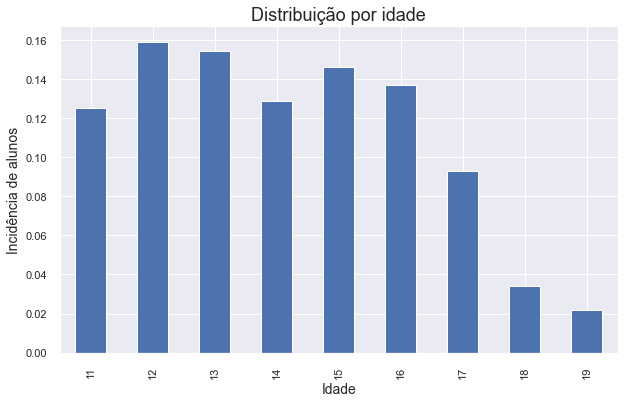

In [25]:
df_socioeconomico.idade.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title("Distribuição por idade", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.show()

### Atenção que na idade 19 é na verdade 19 anos ou mais

---

---

In [26]:
df_socioeconomico.groupby(['regiao_geografica']).cor_ou_raca.value_counts(normalize=True)

regiao_geografica  cor_ou_raca  
Centro-Oeste       Parda           0.43
                   Branca          0.38
                   Preta           0.11
                   Amarela         0.05
                   Indígena        0.04
                   Não informado   0.00
Nordeste           Parda           0.48
                   Branca          0.28
                   Preta           0.14
                   Amarela         0.05
                   Indígena        0.05
Norte              Parda           0.53
                   Branca          0.28
                   Preta           0.12
                   Amarela         0.04
                   Indígena        0.04
                   Não informado   0.00
Sudeste            Branca          0.42
                   Parda           0.39
                   Preta           0.12
                   Amarela         0.04
                   Indígena        0.03
                   Não informado   0.00
Sul                Branca          0.64
       

### Podemos perceber que nas regiões há diferença na distribuição de cor/raça
### No Sul e Sudeste há uma maioria declarada é branca, no sul a diferença é maior, enquanto no norte e nordeste a classificação PArda é predominante com diferença marcante contra os brancos.

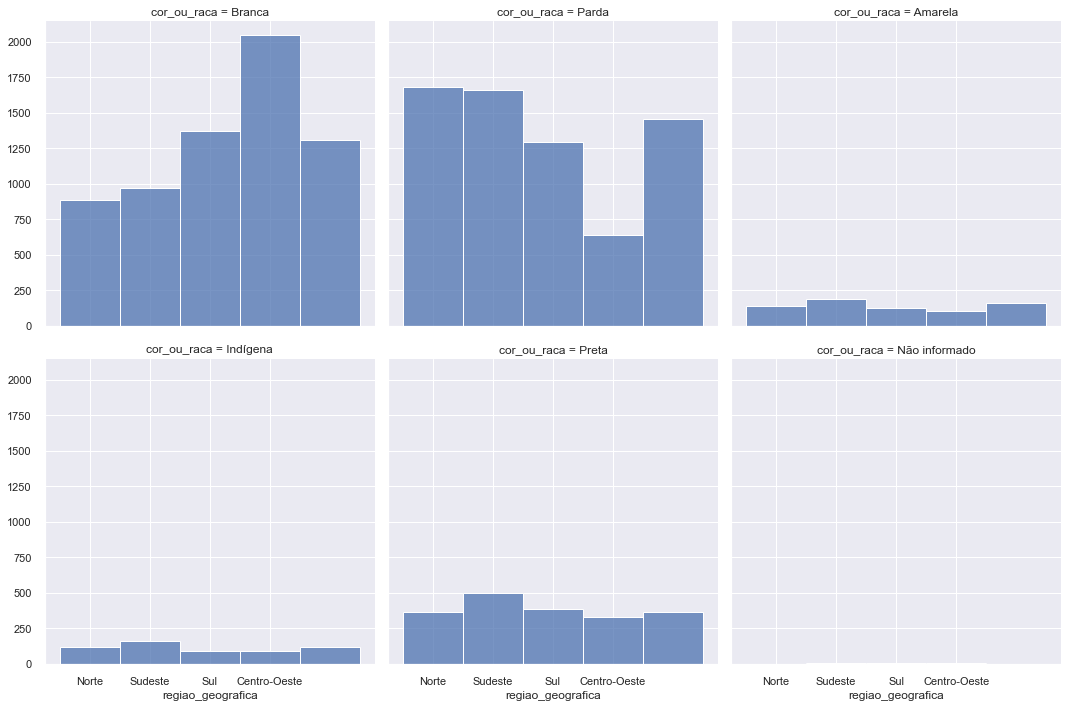

In [27]:
g = sns.FacetGrid(df_socioeconomico, col="cor_ou_raca", height=5, col_wrap=3)
g.map(sns.histplot, 'regiao_geografica')

### Podemos perceber como os alunos de dividem conforme sua raça nas regiões

---

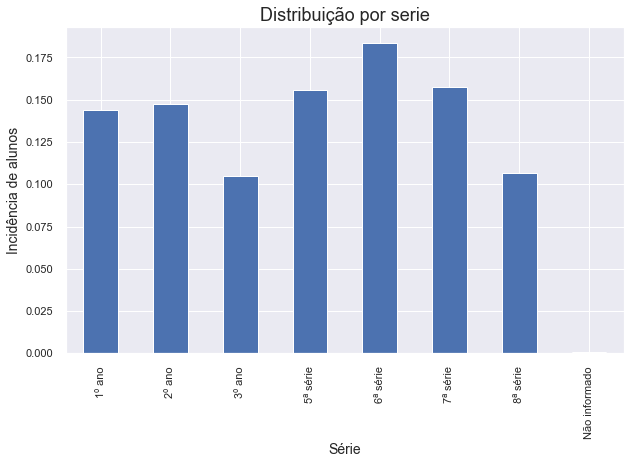

In [28]:
df_socioeconomico.serie_atual.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title("Distribuição por serie", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Série', fontsize=14)
plt.show()

In [29]:
df_socioeconomico.groupby(['serie_atual']).idade.value_counts(normalize=True)

serie_atual    idade
1º ano         15      0.46
               16      0.21
               14      0.17
               17      0.10
               18      0.03
                       ... 
Não informado  12      0.22
               15      0.22
               13      0.11
               14      0.11
               17      0.11
Name: idade, Length: 66, dtype: float64

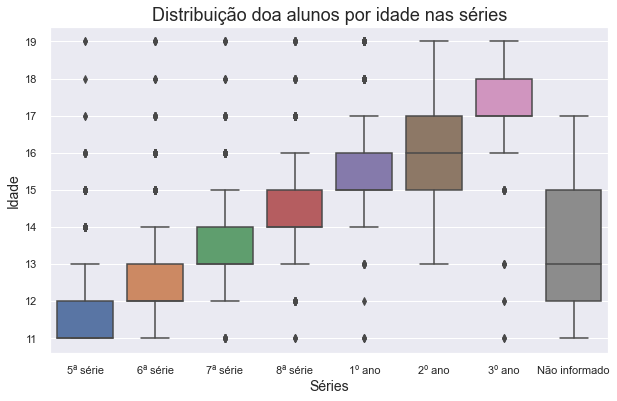

In [30]:
sns.boxplot(x="serie_atual", y="idade", data=df_socioeconomico, order=['5ª série', '6ª série', '7ª série', '8ª série', '1º ano','2º ano', '3º ano', 'Não informado'])
plt.title("Distribuição doa alunos por idade nas séries", fontsize=18)
plt.ylabel('Idade', fontsize=14)
plt.xlabel('Séries', fontsize=14)
plt.show()

### Como esperado, a idade aumenta conforme a série aumenta, mas podemos perceber a presença em todas as séries alunos com idades maiores na condição de outliers, com 19 anos ou mais.
### Outra coisa que chamou atenção foi que há outliers de idade inferior no 1º e 3º ano do ensino médio com idade de 11 anos.

---

In [31]:
df_socioeconomico.mora_com_mae.value_counts()

Sim              14679
Não               1866
Não informado       11
Name: mora_com_mae, dtype: int64

In [32]:
df_socioeconomico.mora_com_pai.value_counts()

Sim              10460
Não               6081
Não informado       15
Name: mora_com_pai, dtype: int64

In [33]:
df_socioeconomico.groupby(['mora_com_mae', 'mora_com_pai']).cor_ou_raca.value_counts(normalize=True)

mora_com_mae   mora_com_pai   cor_ou_raca  
Não            Não            Parda           0.46
                              Branca          0.32
                              Preta           0.14
                              Amarela         0.04
                              Indígena        0.03
               Não informado  Parda           1.00
               Sim            Parda           0.42
                              Branca          0.38
                              Preta           0.11
                              Amarela         0.05
                              Indígena        0.04
Não informado  Não            Parda           0.50
                              Preta           0.50
               Não informado  Branca          0.43
                              Parda           0.29
                              Indígena        0.14
                              Não informado   0.14
               Sim            Amarela         0.50
                              Preta   

## Há indícios de uma questão racial importante na consolidação familiar.
### Os pardos são em maioria quando não moram com um ou os dois dos pais, enquanto a maioria dos brancos mora com pai e mãe

<AxesSubplot:xlabel='mora_com_mae,mora_com_pai,cor_ou_raca'>

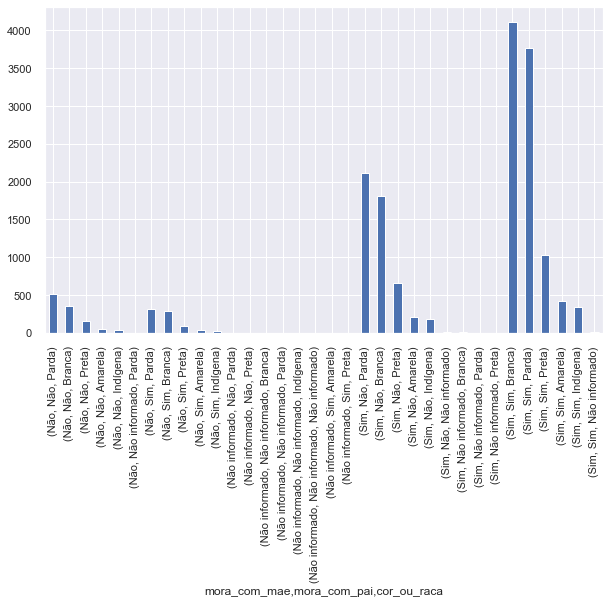

In [34]:
df_socioeconomico.groupby(['mora_com_mae', 'mora_com_pai']).cor_ou_raca.value_counts().plot(kind='bar')

## O gráfico parece confuso, mas usando os numeros absolutos podemos ver que a distribuição mais significativa está nas familias em que a criança mora com os pais e em segundo lugar nos lares que a criança mora somente com a mãe

---

In [35]:
df_socioeconomico.frequencia_ficar_com_fome_sem_comida_em_casa.value_counts(normalize=True)

Nunca                      0.77
Raramente                  0.11
Às vezes                   0.09
Na maior parte das vezes   0.02
Sempre                     0.01
Não informado              0.00
Name: frequencia_ficar_com_fome_sem_comida_em_casa, dtype: float64

## Embora possamos ver que 77% dizem que nunca ficaram com fome em casa, é preocupante que 23% (quase 1/4 dos estudantes) experimentem a fome, mesmo que raramente.

In [36]:
pd.crosstab(df_socioeconomico.cor_ou_raca, df_socioeconomico.frequencia_ficar_com_fome_sem_comida_em_casa)

frequencia_ficar_com_fome_sem_comida_em_casa,Na maior parte das vezes,Nunca,Não informado,Raramente,Sempre,Às vezes
cor_ou_raca,,,,,,
Amarela,12,552,2,77,10,59
Branca,91,5149,10,710,79,536
Indígena,13,436,2,66,8,56
Não informado,1,16,2,2,0,2
Parda,105,5234,7,711,79,590
Preta,31,1438,7,220,43,200


### Na observação da frquencia do ficar com fome, com relação a questão racial, observamos que não é possível apurar questão racial 

In [37]:
pd.crosstab(df_socioeconomico.regiao_geografica, df_socioeconomico.frequencia_ficar_com_fome_sem_comida_em_casa)

frequencia_ficar_com_fome_sem_comida_em_casa,Na maior parte das vezes,Nunca,Não informado,Raramente,Sempre,Às vezes
regiao_geografica,,,,,,
Centro-Oeste,56,2683,10,359,33,279
Nordeste,55,2718,3,335,57,297
Norte,47,2371,2,377,52,339
Sudeste,47,2578,9,349,39,254
Sul,48,2475,6,366,38,274


### Na observação da frquencia do ficar com fome, com relação a questão racial, observamos que não é possível apurar questão regional 

---

In [38]:
df_socioeconomico

,regiao_geografica,sexo,cor_ou_raca,idade,serie_atual,turno,mora_com_mae,mora_com_pai,telefone_fixo_em_casa,possui_celular,computador_em_casa,internet_em_casa,carro_em_casa,esc_urbana_ou_rural,esc_publica_ou_privada,esfera_adm_escola,quantidade_banheiros_casa,frequencia_ficar_com_fome_sem_comida_em_casa,tipo_escola_privada
0,Norte,Feminino,Branca,13,8ª série,Manhã,Sim,Não,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,3 banheiros,Nunca,Particular
1,Norte,Feminino,Branca,14,8ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,1 banheiro,Nunca,Particular
2,Norte,Masculino,Parda,13,8ª série,Manhã,Sim,Sim,Não,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Nunca,Particular
3,Norte,Masculino,Branca,14,8ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,3 banheiros,Nunca,Particular
4,Norte,Masculino,Branca,13,8ª série,Manhã,Sim,Não,Não,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,4 banheiros ou mais,Às vezes,Particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,Centro-Oeste,Feminino,Parda,12,7ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Raramente,Particular
16552,Centro-Oeste,Masculino,Branca,15,7ª série,Manhã,Sim,Sim,Não,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Nunca,Particular
16553,Centro-Oeste,Masculino,Parda,13,7ª série,Manhã,Sim,Sim,Sim,Não,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Raramente,Particular
16554,Centro-Oeste,Masculino,Parda,14,7ª série,Manhã,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Urbana,Privada,Privada,2 banheiros,Nunca,Particular


In [39]:
df_socioeconomico.esc_publica_ou_privada.value_counts()

Pública    12381
Privada     4175
Name: esc_publica_ou_privada, dtype: int64

In [40]:
df_socioeconomico.esfera_adm_escola.value_counts()

Estadual     9009
Privada      4175
Federal      3072
Municipal     300
Name: esfera_adm_escola, dtype: int64

In [41]:
print(f'Das {df_socioeconomico.esc_publica_ou_privada.value_counts()[0]} escolas públicas, observamos que as mesmas são divididas da seguinte maneira:\n')
display(df_socioeconomico.query("esfera_adm_escola != 'Privada'").esfera_adm_escola.value_counts())

Das 12381 escolas públicas, observamos que as mesmas são divididas da seguinte maneira:



Estadual     9009
Federal      3072
Municipal     300
Name: esfera_adm_escola, dtype: int64

In [42]:
print(f'Das {df_socioeconomico.esc_publica_ou_privada.value_counts()[1]} escolas particulares, observamos que as mesmas são divididas da seguinte maneira:\n')
display(df_socioeconomico.query("esfera_adm_escola == 'Privada'").tipo_escola_privada.value_counts())

Das 4175 escolas particulares, observamos que as mesmas são divididas da seguinte maneira:



Particular      3265
Filantrópica     800
Comunitária       60
Confessional      50
Name: tipo_escola_privada, dtype: int64

---

## Segunda parte da análise vai focar na saúde mental, especialmente para encontrar fatores associados ao suicídio infantil
### Como fonte bibliográfica usei o artigo:
### Revisão de literatura sobre suicídio na infância. DOI: 10.1590/1413-81232017229.14582017

### Como hipótese temos que essa pesquisa pode identificar jovens que possuam fatores que sejam motivadores de ideação suicída e com isso promover políticas de saúde mental para evitar essa tragédia

## Começando com a substituição das nomenclaturas e conteúdo para facilitar a análise

In [43]:
df_com_nomes.VB07002 = df_com_nomes.VB07002.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maior parte do tempo', 5 : 'Sempre', 99 : 'Não informado'})
df_com_nomes.VB07004 = df_com_nomes.VB07004.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maior parte do tempo', 5 : 'Sempre', 99 : 'Não informado'})
df_com_nomes.VB07006 = df_com_nomes.VB07006.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maior parte do tempo', 5 : 'Sempre', 99 : 'Não informado'})
df_com_nomes.VB07007 = df_com_nomes.VB07007.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maior parte do tempo', 5 : 'Sempre', 99 : 'Não informado'})
df_com_nomes.VB07009 = df_com_nomes.VB07009.replace({1 : 'Sim', 2 : 'Não', 99 : 'Não informado'})
df_com_nomes.VB07010 = df_com_nomes.VB07010.replace({1 : 'Sim', 2 : 'Não', 3 : 'Não sei o que é bullying', 99 : 'Não informado'})
df_com_nomes.VB12001 = df_com_nomes.VB12001.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maioria das vezes', 5 : 'Sempre', 99 : 'Não informado'})
df_com_nomes.VB12002 = df_com_nomes.VB12002.replace({1 : 'Nunca', 2 : 'Raramente', 3 : 'Às vezes', 4 : 'Na maioria das vezes', 5 : 'Sempre', 99 : 'Não informado'})
df_com_nomes.VB12003 = df_com_nomes.VB12003.replace({1 : 'Nenhum amigo (0)', 2 : '1 amigo', 3 : '2 amigos', 4 : '3 ou mais amigos', 99 : 'Não informado'})
df_com_nomes.VB07008 = df_com_nomes.VB07008.replace({-1 : "Pulo no questionário", 1 : "A minha cor ou raça", 2 : "A minha religião", 3 : "A aparência do meu rosto", 4 : "A aparência do meu corpo",
                                 5 : "A minha orientação sexual", 6 : "A minha região de origem", 7 : "Outros motivos/causas", 99 : "Não informado"})
df_com_nomes.VB09003 = df_com_nomes.VB09003.replace({1 : "Nenhuma vez nos últimos 30 dias (0 vez)", 2 : "1 vez nos últimos 30 dias", 3 : "2 ou 3 vezes nos últimos 30 dias", 
                                 4 : "4 ou 5 vezes nos últimos 30 dias", 5 : "6 ou 7 vezes nos últimos 30 dias", 6 : "8 ou 9 vezes nos últimos 30 dias", 
                                 7 : "10 ou 11 vezes nos últimos 30 dias", 8 : "12 vezes ou mais nos últimos 30 dias", 99 : "Não informado"})
df_com_nomes.VB09016 = df_com_nomes.VB09016.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})
df_com_nomes.VB0901701 = df_com_nomes.VB0901701.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})
df_com_nomes.VB0901702 = df_com_nomes.VB0901702.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})
df_com_nomes.VB0901703 = df_com_nomes.VB0901703.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})
df_com_nomes.VB0901704 = df_com_nomes.VB0901704.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})
df_com_nomes.VB0901705 = df_com_nomes.VB0901705.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})
df_com_nomes.VB0901706 = df_com_nomes.VB0901706.replace({-1 : "Pulo no questionário", 1 : "Sim", 2 : "Não", 99 : "Não informado"})

In [44]:
df_com_nomes.rename(columns={'VB07002' : 'pais_ciencia_tempo_livre', 'VB07004' : 'pais_entender_problemas', 'VB07006' : 'colegas_tratam_bem', 'VB07007' : 'sofrer_ofensas_colegas',
                  'VB07008' : 'motivo_ofensas', 'VB07009' : 'causar_ofensas', 'VB07010' : 'sofrer_bullying', 'VB12001' : 'sentir_se_sozinho', 'VB12002' : 'não_dormir_noite',
                   'VB12003' : 'quantidade_amigos', 'VB09003' : 'sofrer_agrecao_fisica_familiar', 'VB09016' : 'sexo_forcado', 'VB0901701' : 'sexo_forcado_namorado',
                   'VB0901702' : 'sexo_forcado_amigo', 'VB0901703' : 'sexo_forcado_pais_ou_padastros', 'VB0901704' : 'sexo_forcado_familiares', 
                   'VB0901705' : 'sexo_forcado_desconhecido', 'VB0901706' : 'sexo_forcado_outros',}, inplace=True)

### Como o artigo usado como base teórica considera apenas as crianças menores de 14 anos, usarei esse filtro para o próximo dataframe

In [45]:
df_mental = df_com_nomes[df_com_nomes.idade < 14][['pais_ciencia_tempo_livre', 'pais_entender_problemas', 'colegas_tratam_bem', 'sofrer_ofensas_colegas', 'motivo_ofensas', 'causar_ofensas',
                          'sofrer_bullying', 'sentir_se_sozinho', 'não_dormir_noite', 'quantidade_amigos', 'sofrer_agrecao_fisica_familiar', 'sexo_forcado', 
                          'sexo_forcado_namorado', 'sexo_forcado_amigo', 'sexo_forcado_pais_ou_padastros', 'sexo_forcado_familiares', 'sexo_forcado_desconhecido', 
                          'sexo_forcado_outros']]

In [46]:
df_mental

,pais_ciencia_tempo_livre,pais_entender_problemas,colegas_tratam_bem,sofrer_ofensas_colegas,motivo_ofensas,causar_ofensas,sofrer_bullying,sentir_se_sozinho,não_dormir_noite,quantidade_amigos,sofrer_agrecao_fisica_familiar,sexo_forcado,sexo_forcado_namorado,sexo_forcado_amigo,sexo_forcado_pais_ou_padastros,sexo_forcado_familiares,sexo_forcado_desconhecido,sexo_forcado_outros
0,Sempre,Sempre,Na maior parte do tempo,Nunca,Pulo no questionário,Não,Não,Nunca,Nunca,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
2,Sempre,Raramente,Sempre,Raramente,Outros motivos/causas,Sim,Sim,Nunca,Raramente,2 amigos,12 vezes ou mais nos últimos 30 dias,Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
4,Na maior parte do tempo,Na maior parte do tempo,Às vezes,Raramente,A aparência do meu corpo,Sim,Sim,Raramente,Raramente,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Sim,Não,Não,Não,Não,Não,Sim
8,Na maior parte do tempo,Na maior parte do tempo,Na maior parte do tempo,Nunca,Pulo no questionário,Não,Sim,Nunca,Nunca,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
10,Sempre,Sempre,Às vezes,Às vezes,A minha orientação sexual,Não,Não,Raramente,Raramente,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16548,Sempre,Raramente,Às vezes,Raramente,Outros motivos/causas,Sim,Sim,Sempre,Às vezes,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
16549,Sempre,Sempre,Às vezes,Raramente,Outros motivos/causas,Não,Não,Raramente,Raramente,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
16550,Sempre,Às vezes,Sempre,Nunca,Pulo no questionário,Não,Não,Raramente,Nunca,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Não,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário
16551,Sempre,Sempre,Sempre,Às vezes,Outros motivos/causas,Não,Sim,Nunca,Nunca,3 ou mais amigos,Nenhuma vez nos últimos 30 dias (0 vez),Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário,Pulo no questionário


---

## O primeiro e mais importante fator motivador é o bullying

In [47]:
df_mental.sofrer_bullying.value_counts()

Não                         3729
Sim                         3275
Não sei o que é bullying     231
Não informado                 32
Name: sofrer_bullying, dtype: int64

In [48]:
df_mental.sofrer_bullying.value_counts(normalize=True)

Não                        0.51
Sim                        0.45
Não sei o que é bullying   0.03
Não informado              0.00
Name: sofrer_bullying, dtype: float64

## Primeiro ponto de atenção temos que 45% (n=3.275) das crianças da amostra com menos de 14 anos relatam sofrerem bullying

---

## Outros fatores importantes estão na análise das crises disciplinares e abandono escolar, infelizmente não podem ser analizados nessa amostra, pois não são tratados na pesquisa 

---

## Segundo fator importante está na dificuldade de interação social

In [49]:
df_mental.quantidade_amigos.value_counts()

3 ou mais amigos    5925
2 amigos             693
1 amigo              392
Nenhum amigo (0)     219
Não informado         38
Name: quantidade_amigos, dtype: int64

### essa amostra tem pouca incidência de alunos que relatem 2 ou menos amigos

In [50]:
df_mental.sentir_se_sozinho.value_counts()

Nunca                   3053
Às vezes                1801
Raramente               1422
Na maioria das vezes     552
Sempre                   401
Não informado             38
Name: sentir_se_sozinho, dtype: int64

## Em compensação temos uma incidência maior quando perguntado sobre se sentir sozinho

In [51]:
nao_so1 = df_mental.sentir_se_sozinho != 'Nunca' 
nao_so2 = df_mental.sentir_se_sozinho != 'Raramente'
nao_so3 = df_mental.sentir_se_sozinho != 'Não informado'
df_mental[nao_so1 & nao_so2 & nao_so3].shape

(2754, 18)

## Considerando como resposta 'Às vezes', 'Na maioria das vezes', 'Sempre' observamos o total de 2.754 crianças, isso equivale a 38% 

---

## Vamos contabilizar quanto se tem um nível de sentimento de solidão combinado ao bullying

In [52]:
sofre_bullying = df_mental.sofrer_bullying == 'Sim'
df_mental[nao_so1 & nao_so2 & nao_so3 & sofre_bullying].shape[0]

1603

## Encontramos o total de 1603 crianças que se sentem só e sofrem bullying

---

### Dentre outros fatores há o fato de ter sofrido abuso sexual

In [53]:
df_mental.sexo_forcado.value_counts()

Pulo no questionário    4706
Não                     2418
Sim                      116
Não informado             27
Name: sexo_forcado, dtype: int64

In [54]:
abuso_sexual = df_mental.sexo_forcado == 'Sim'
abuso_sexual

0        False
2        False
4         True
8        False
10       False
         ...  
16548    False
16549    False
16550    False
16551    False
16553    False
Name: sexo_forcado, Length: 7267, dtype: bool

## Adicionando mais esse fator, podemos identificar crianças que esão em condição de alerta para o risco de ideação suicída

In [55]:
df_mental[nao_so1 & nao_so2 & nao_so3 & sofre_bullying & abuso_sexual].shape[0]

48

---

## Vamos ver o perfil dessas 48 crianças da amostra

In [56]:
fator_idade = df_com_nomes.idade < 14
fator_solidao_1 = df_com_nomes.sentir_se_sozinho != 'Nunca' 
fator_solidao_2 = df_com_nomes.sentir_se_sozinho != 'Raramente'
fator_solidao_3 = df_com_nomes.sentir_se_sozinho != 'Não informado'
fator_abuso_sexual = df_com_nomes.sexo_forcado == 'Sim'
fator_sofrer_bullying = df_com_nomes.sofrer_bullying == 'Sim'

In [57]:
df_com_nomes[fator_idade & fator_solidao_1 & fator_solidao_2 & fator_solidao_3 & fator_abuso_sexual & fator_sofrer_bullying].shape

(48, 178)

In [58]:
df_risco_suicidio = df_com_nomes[fator_idade & fator_solidao_1 & fator_solidao_2 & fator_solidao_3 & fator_abuso_sexual & fator_sofrer_bullying]
df_risco_suicidio

,regiao_geografica,sexo,cor_ou_raca,idade,VB01004,VB01005,mora_com_mae,mora_com_pai,VB01008A,VB01010A,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,esc_urbana_ou_rural,esc_publica_ou_privada,esfera_adm_escola,tipo_escola_privada,aluno,escola,turma
550,Norte,Masculino,Branca,13,3,8,Sim,Não,7,4,...,1211,1,223.27,Urbana,Privada,Privada,Particular,551,13,269
1321,Norte,Masculino,Branca,13,9,4,Sim,Sim,2,7,...,1111,1,822.97,Rural,Pública,Federal,Pulo no questionário,1322,30,154
1339,Norte,Masculino,Branca,13,5,8,Sim,Sim,6,2,...,1121,1,590.79,Urbana,Pública,Federal,Pulo no questionário,1340,32,46
1340,Norte,Masculino,Parda,13,5,8,Sim,Não,8,4,...,1121,1,590.79,Urbana,Pública,Federal,Pulo no questionário,1341,32,46
1369,Norte,Masculino,Parda,13,5,7,Sim,Não,2,6,...,1121,1,561.89,Urbana,Pública,Federal,Pulo no questionário,1370,32,47
1733,Norte,Feminino,Branca,13,7,7,Sim,Sim,8,10,...,1121,1,475.54,Urbana,Pública,Federal,Pulo no questionário,1734,39,508
1811,Norte,Masculino,Preta,13,6,10,Sim,Sim,7,10,...,1123,1,539.39,Urbana,Pública,Estadual,Pulo no questionário,1812,41,506
2188,Norte,Feminino,Indígena,13,4,8,Não,Não,1,10,...,1123,1,408.59,Urbana,Pública,Estadual,Pulo no questionário,2189,49,456
2367,Norte,Feminino,Parda,13,11,7,Sim,Não,8,5,...,1111,1,654.12,Urbana,Pública,Estadual,Pulo no questionário,2368,52,420
2507,Norte,Masculino,Parda,13,1,8,Sim,Sim,2,6,...,1123,1,292.16,Urbana,Pública,Estadual,Pulo no questionário,2508,56,366


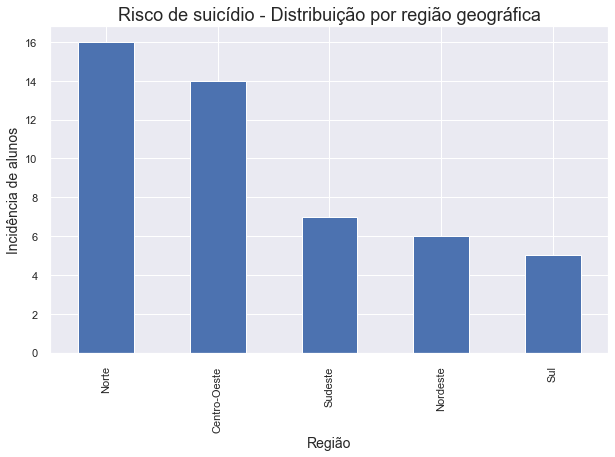

In [59]:
df_risco_suicidio.regiao_geografica.value_counts().plot(kind='bar')
plt.title("Risco de suicídio - Distribuição por região geográfica", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Região', fontsize=14)
plt.show()

### Regiões Norte e Centro-Oeste são as com maior prevalência do risco de suicídio infantil

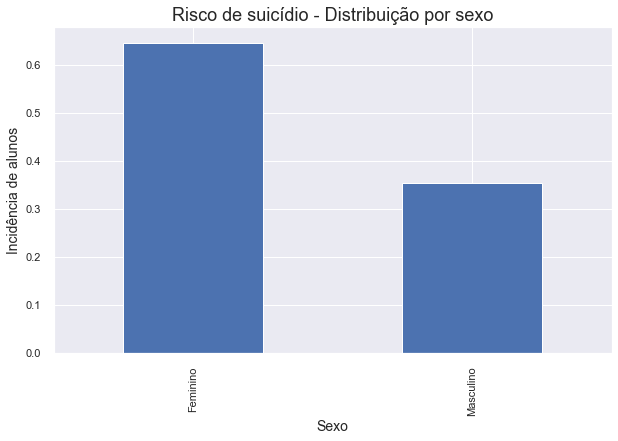

In [60]:
df_risco_suicidio.sexo.value_counts(normalize=True).plot(kind='bar')
plt.title("Risco de suicídio - Distribuição por sexo", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Sexo', fontsize=14)
plt.show()

### Acabamos de encontrar que a ideação suicída nas menindas há maior prevalência

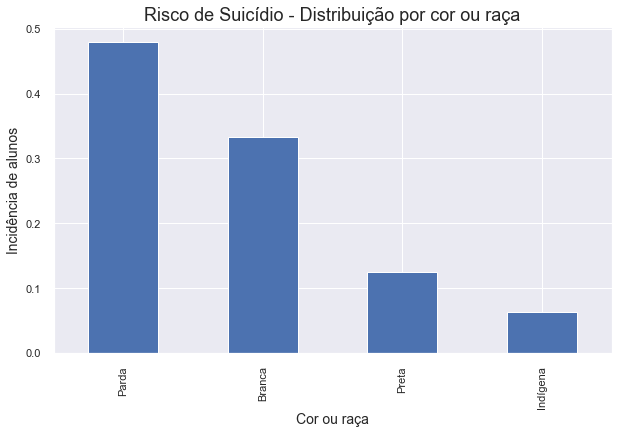

In [61]:
df_risco_suicidio.cor_ou_raca.value_counts(normalize=True).plot(kind='bar')
plt.title("Risco de Suicídio - Distribuição por cor ou raça", fontsize=18)
plt.ylabel('Incidência de alunos', fontsize=14)
plt.xlabel('Cor ou raça', fontsize=14)
plt.show()

# Não tem a mesma proporção que a distribuição de toda a amostra. A diferença entre Pardos e Brancos é maior

In [62]:
pd.crosstab(df_risco_suicidio.regiao_geografica, df_risco_suicidio.cor_ou_raca)

cor_ou_raca,Branca,Indígena,Parda,Preta
regiao_geografica,,,,
Centro-Oeste,6,0,6,2
Nordeste,1,1,3,1
Norte,6,1,6,3
Sudeste,0,1,6,0
Sul,3,0,2,0


In [63]:
pd.crosstab(df_risco_suicidio.sexo, df_risco_suicidio.cor_ou_raca)

cor_ou_raca,Branca,Indígena,Parda,Preta
sexo,,,,
Feminino,13,1,13,4
Masculino,3,2,10,2


### Nessa tabela podemos ver que há uma incidência muito grande para meninos pardos com relação aos demais

---

In [64]:
df_risco_suicidio.esfera_adm_escola.value_counts()

Estadual    25
Federal     16
Privada      7
Name: esfera_adm_escola, dtype: int64

### Percebemos que a incidÊncia maior desses alunos está no ambente da educação pública.

In [65]:
df_risco_suicidio.escola.value_counts()

32     3
64     2
65     2
370    2
103    2
363    2
164    1
362    1
41     1
300    1
365    1
361    1
111    1
175    1
49     1
306    1
52     1
285    1
56     1
320    1
62     1
39     1
167    1
226    1
30     1
195    1
260    1
133    1
71     1
201    1
330    1
140    1
13     1
332    1
211    1
340    1
213    1
94     1
295    1
221    1
319    1
Name: escola, dtype: int64

## Podemos perceber que a situação de risco não esá concentrada em poucas escolas

# Conclusão

Pudemos observar que é possível identificar alguns fatores de risco para o suicídio infantil com base na PeNSE e na posse desse conhecimento, aliado ao conhecimento específico de pesquisadores da psicologia, preparar políticas públicas de prevenção de suicídio.
Embora pareça pouco significativo, uma criança que vem a se matar é um impacto incomensurável para a família e pessoas próximas.
Uma proposição seria a de identificar de alguma maneira esses jovens em situação vulnerável para ajudá-los.